## Değişkenler
**KURUM ADI**: okul_adi  
**Toplam Öğrenci Sayısı**: ogr_sayisi  
**Taşımalı Öğrenci Sayısı**: tasimali_ogr_say  
**Toplam Kapalı Bina Alanı**: bina_alani  
**Toplam Bahçe Alanı**: bahce_alani  
**Toplam Kapalı Spor Alanı**: kapali_spor_alani  
**Toplam Açık Spor Alanı**: acik_spor_alani  
**Toplam Kantin Alanı**: kantin_alani  
**Çok Amaçlı Salon Var Mı?**: cok_amacli_salon  
**Toplam Aktif Derslik Sayısı Nedir?**: derslik_sayisi  
**Personelin Ortalama Hizmet Süresi Nedir?**: personel_hizmet_suresi  
**Personelin Ortalama Yaşı Nedir?**: personel_yas  
**Doktora Öğrenimine Devam Eden Personel Sayısı**: doktora_devam_personel  
**Doktora Mezunu Personel Sayısı**: doktora_mezunu  
**Yüksek Lisansına Devam Eden Personel Sayısı**: yuksek_devam  
**Yüksek Lisans Mezunu Personel Sayısı**: yuksek_mezun  
**Tasarım Beceri Atölyesi Var Mı?**: tasarim_atolyesi  
**Fen Laboratuvarı Var Mı?**: fen_laboratuvari  
**Bilişim Teknolojileri Laboratuvarı Var Mı?**: bilisim_laboratuvari



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
os.chdir("/content/drive/MyDrive/Works/Bitirme")

# Okul Verilerinin Çekilmesi

In [ ]:
data_file = "Data/Ortaokullar.xlsx"
data_original = pd.read_excel(data_file)
df_okullar = data_original.copy()
#df = df.drop(columns=["okuladi", "okulno"])
df_okullar.head()

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,derslik_sayisi,personel_hizmet_suresi,personel_yas,doktora_devam_personel,doktora_mezunu,yuksek_devam,yuksek_mezun,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari
0,OKUL1,982,0,8750,4850,300,2000,500.0,EVET,30,5.00,41.00,1,0,0,8,EVET,HAYIR,EVET
1,OKUL2,297,0,3315,2443,0,2443,15.0,HAYIR,30,19.00,44.00,0,1,1,8,HAYIR,HAYIR,HAYIR
2,OKUL3,498,34,1473,4500,698,500,100.0,EVET,29,13.00,37.00,1,0,1,4,HAYIR,EVET,EVET
3,OKUL4,880,0,8820,6768,0,500,60.0,HAYIR,32,15.61,47.75,0,0,1,2,EVET,EVET,EVET
4,OKUL5,120,12,1982,8879,0,3000,18.0,EVET,7,18.00,41.00,0,0,0,1,EVET,HAYIR,HAYIR


## Evet->1 Hayır->0 olacak şekilde düzeltme

In [ ]:
def evet_hayir(degisken):
  for i in df_okullar[degisken].index:
    if df_okullar[degisken][i] =="EVET":
      df_okullar[degisken][i] = 1
    elif df_okullar[degisken][i]=="HAYIR":
      df_okullar[degisken][i]=0

In [ ]:
evet_hayir("cok_amacli_salon")
evet_hayir("tasarim_atolyesi")
evet_hayir("fen_laboratuvari")
evet_hayir("bilisim_laboratuvari")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_okullar.head()

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,derslik_sayisi,personel_hizmet_suresi,personel_yas,doktora_devam_personel,doktora_mezunu,yuksek_devam,yuksek_mezun,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari
0,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.00,41.00,1,0,0,8,1,0,1
1,OKUL2,297,0,3315,2443,0,2443,15.0,0,30,19.00,44.00,0,1,1,8,0,0,0
2,OKUL3,498,34,1473,4500,698,500,100.0,1,29,13.00,37.00,1,0,1,4,0,1,1
3,OKUL4,880,0,8820,6768,0,500,60.0,0,32,15.61,47.75,0,0,1,2,1,1,1
4,OKUL5,120,12,1982,8879,0,3000,18.0,1,7,18.00,41.00,0,0,0,1,1,0,0


# Aykırı Değerlerin Tespiti

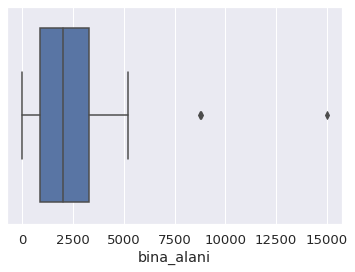

In [ ]:
sns.boxplot(x = df_okullar.bina_alani)

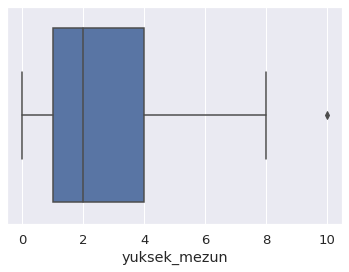

In [ ]:
sns.boxplot(x = df_okullar.yuksek_mezun)

#Not Verileri Çekilmesi

In [ ]:
data_file = "Data/Veriseti_Ortaokullar_GONDERILEN.xlsx"
data_original = pd.read_excel(data_file)
df_notlar = data_original.copy()
#df = df.drop(columns=["okuladi", "okulno"])
df_notlar

,okuladi,okulno,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,OKUL1,okulno0001,1,0,0,0,0,0,0,5,4,1,0,3,3,0,1,1,5,2,2,2,2,0,0,0,85.5956,88.0247,91.0988
1,OKUL1,okulno0002,1,0,0,0,0,0,0,2,4,1,0,2,3,0,1,3,3,3,2,2,2,0,0,1,96.3081,94.9244,97.2963
2,OKUL1,okulno0003,1,0,0,0,0,0,0,4,2,1,0,3,3,0,1,2,1,0,4,3,2,1,0,1,93.4270,91.3742,89.7531
3,OKUL1,okulno0004,1,0,0,0,0,0,0,2,4,1,0,4,4,0,1,4,3,3,1,4,4,1,1,1,64.5563,64.8812,61.3426
4,OKUL1,okulno0005,1,0,0,0,0,0,0,2,2,1,0,4,2,1,1,4,4,2,1,4,1,0,1,0,91.8089,93.9298,93.3457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,OKUL31,okulno1176,0,0,0,0,0,0,0,2,4,1,0,3,3,1,1,3,1,2,4,1,3,0,1,1,97.4291,95.1857,95.7143
1176,OKUL31,okulno1177,1,0,0,0,0,0,0,4,3,1,0,3,3,1,1,4,2,3,3,2,4,0,1,1,89.9984,85.7941,87.6460
1177,OKUL31,okulno1178,0,0,0,0,0,0,0,2,3,1,0,3,3,0,1,3,3,1,1,1,3,1,1,1,98.2679,98.5000,95.3492
1178,OKUL31,okulno1179,1,0,0,0,0,0,0,4,3,1,0,2,4,0,1,3,1,1,3,1,3,0,1,0,94.0053,92.5302,95.2413


In [ ]:
df_notlar["okuladi"].value_counts()

OKUL2     219
OKUL4     127
OKUL22    101
OKUL1      83
OKUL23     61
OKUL6      57
OKUL31     52
OKUL18     48
OKUL21     45
OKUL20     43
OKUL29     36
OKUL16     33
OKUL3      33
OKUL10     26
OKUL26     23
OKUL9      22
OKUL15     20
OKUL25     18
OKUL14     17
OKUL13     17
OKUL19     17
OKUL8      15
OKUL11     14
OKUL5      13
OKUL28     12
OKUL24      8
OKUL30      6
OKUL7       5
OKUL17      4
OKUL27      3
OKUL12      2
Name: okuladi, dtype: int64

##30'dan fazla veri içeren okulların tespit edilmesi

In [ ]:
df_not_okul = pd.DataFrame(df_notlar["okuladi"].value_counts() > 29)
df_not_okul

,okuladi
OKUL2,True
OKUL4,True
OKUL22,True
OKUL1,True
OKUL23,True
OKUL6,True
OKUL31,True
OKUL18,True
OKUL21,True
OKUL20,True


In [ ]:
df_not_okul = df_not_okul.index[df_not_okul['okuladi'] == True].tolist()

30'dan fazla veri içeren okul isimleri;

In [ ]:
df_not_okul

['OKUL2',
 'OKUL4',
 'OKUL22',
 'OKUL1',
 'OKUL23',
 'OKUL6',
 'OKUL31',
 'OKUL18',
 'OKUL21',
 'OKUL20',
 'OKUL29',
 'OKUL16',
 'OKUL3']

In [ ]:
type(df_not_okul)

list

### Bu okullara ait öğrenci bilgilerinin çekilmesi

In [ ]:
value_list = df_not_okul
boolean_series = df_notlar.okuladi.isin(value_list)
filtered_df = df_notlar[boolean_series]

In [ ]:
filtered_df

,okuladi,okulno,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
0,OKUL1,okulno0001,1,0,0,0,0,0,0,5,4,1,0,3,3,0,1,1,5,2,2,2,2,0,0,0,85.5956,88.0247,91.0988
1,OKUL1,okulno0002,1,0,0,0,0,0,0,2,4,1,0,2,3,0,1,3,3,3,2,2,2,0,0,1,96.3081,94.9244,97.2963
2,OKUL1,okulno0003,1,0,0,0,0,0,0,4,2,1,0,3,3,0,1,2,1,0,4,3,2,1,0,1,93.4270,91.3742,89.7531
3,OKUL1,okulno0004,1,0,0,0,0,0,0,2,4,1,0,4,4,0,1,4,3,3,1,4,4,1,1,1,64.5563,64.8812,61.3426
4,OKUL1,okulno0005,1,0,0,0,0,0,0,2,2,1,0,4,2,1,1,4,4,2,1,4,1,0,1,0,91.8089,93.9298,93.3457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,OKUL31,okulno1176,0,0,0,0,0,0,0,2,4,1,0,3,3,1,1,3,1,2,4,1,3,0,1,1,97.4291,95.1857,95.7143
1176,OKUL31,okulno1177,1,0,0,0,0,0,0,4,3,1,0,3,3,1,1,4,2,3,3,2,4,0,1,1,89.9984,85.7941,87.6460
1177,OKUL31,okulno1178,0,0,0,0,0,0,0,2,3,1,0,3,3,0,1,3,3,1,1,1,3,1,1,1,98.2679,98.5000,95.3492
1178,OKUL31,okulno1179,1,0,0,0,0,0,0,4,3,1,0,2,4,0,1,3,1,1,3,1,3,0,1,0,94.0053,92.5302,95.2413


### Okulların gruplanması ve verilerin ortalamalarının alınması

In [ ]:
df_group = filtered_df.groupby("okuladi")

In [ ]:
df_group.mean()

,cinsiyet,Asag,Bsag,Aoz,Boz,ABayri,Abirlikte,Aogrenim,Bogrenim,Acalisma,Bcalisma,gelir,kardes,oda,hastalik,uyku,internet,televizyon,eba_tv,oyun,ders_calisma,okul_dyk,ozel_kurs,sosyal_kulturel,ort5,ort6,ort7
okuladi,,,,,,,,,,,,,,,,,,,,,,,,,,,
OKUL1,0.469880,0.000000,0.000000,0.012048,0.012048,0.060241,0.024096,3.072289,3.963855,0.843373,0.228916,2.951807,2.698795,0.313253,0.927711,3.072289,2.481928,2.385542,2.253012,2.542169,1.939759,0.650602,0.855422,0.506024,84.551946,83.324778,83.262893
OKUL16,0.515152,0.000000,0.000000,0.030303,0.060606,0.030303,0.000000,3.090909,3.151515,0.757576,0.060606,3.060606,2.393939,0.242424,0.939394,2.909091,3.454545,2.393939,2.181818,2.666667,1.727273,0.878788,0.727273,0.636364,82.106579,79.617270,80.058706
OKUL18,0.479167,0.000000,0.020833,0.000000,0.000000,0.145833,0.041667,2.604167,3.062500,0.833333,0.125000,2.270833,2.750000,0.187500,0.916667,2.895833,2.583333,2.375000,2.333333,2.604167,1.666667,0.687500,0.895833,0.687500,77.826667,74.572083,74.118542
OKUL2,0.470320,0.004566,0.009132,0.000000,0.009132,0.100457,0.022831,3.474886,3.794521,0.712329,0.237443,2.908676,2.424658,0.146119,0.931507,3.105023,2.616438,2.255708,2.420091,2.461187,2.013699,0.657534,0.593607,0.607306,87.994951,86.575721,84.277202
OKUL20,0.511628,0.000000,0.000000,0.000000,0.023256,0.093023,0.023256,3.372093,3.906977,0.767442,0.116279,2.930233,2.465116,0.116279,0.976744,2.744186,2.860465,2.372093,2.255814,2.441860,1.976744,0.674419,0.604651,0.488372,84.487412,85.256716,85.477123
OKUL21,0.466667,0.000000,0.000000,0.022222,0.000000,0.066667,0.022222,2.911111,3.333333,0.800000,0.133333,2.533333,2.755556,0.222222,0.866667,2.888889,2.444444,2.311111,2.488889,2.355556,1.777778,0.800000,0.733333,0.711111,80.055633,76.431351,75.300244
OKUL22,0.514851,0.000000,0.000000,0.000000,0.000000,0.108911,0.029703,3.316832,3.673267,0.683168,0.158416,2.871287,2.326733,0.207921,0.910891,3.029703,2.960396,2.336634,2.455446,2.554455,1.891089,0.693069,0.762376,0.643564,79.336634,79.435644,80.178218
OKUL23,0.475410,0.000000,0.000000,0.000000,0.032787,0.065574,0.000000,3.573770,3.967213,0.754098,0.098361,3.295082,2.622951,0.196721,0.901639,2.901639,2.459016,2.262295,2.065574,2.426230,2.278689,0.213115,0.737705,0.639344,88.649480,85.574738,85.195425
OKUL29,0.527778,0.000000,0.027778,0.027778,0.055556,0.111111,0.027778,2.527778,2.833333,0.861111,0.222222,2.277778,3.027778,0.416667,1.000000,3.000000,2.638889,2.583333,2.444444,2.861111,1.500000,0.694444,0.861111,0.750000,74.485833,71.045833,74.703611


In [ ]:
ortalama_df = pd.DataFrame(df_group.mean())

In [ ]:
type(ortalama_df)

pandas.core.frame.DataFrame

###Sene sonu notlarının okullardaki ortalamaları

In [ ]:
okul_ortalamalari = pd.DataFrame(ortalama_df.iloc[:, -3:].mean(axis=1), columns=["ortalamalar"])

In [ ]:
okul_ortalamalari = okul_ortalamalari.reset_index()

In [ ]:
okul_ortalamalari = okul_ortalamalari.sort_values("ortalamalar")

In [ ]:
okul_ortalamalari = okul_ortalamalari.reset_index()
okul_ortalamalari = okul_ortalamalari.iloc[:, -2:]

In [ ]:
okul_ortalamalari

,okuladi,ortalamalar
0,OKUL29,73.411759
1,OKUL18,75.505764
2,OKUL21,77.262410
3,OKUL22,79.650165
4,OKUL16,80.594185
5,OKUL3,82.371177
6,OKUL6,83.199961
7,OKUL1,83.713206
8,OKUL20,85.073750
9,OKUL2,86.282625


#Okul ortalamalarının görselleştirilmesi

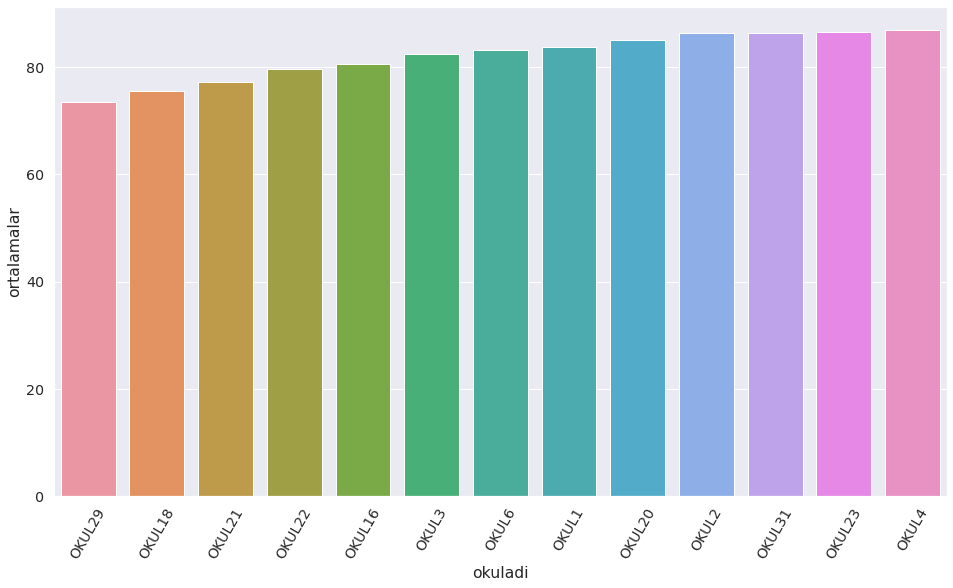

In [ ]:
sns.set_palette("RdBu")
plt.figure(figsize=(16,9))
sns.set(font_scale=1.3)
sns.barplot(x="okuladi", y="ortalamalar", data=okul_ortalamalari)
plt.xticks(rotation=60)
plt.show()

#Okulların özelliklerinin ve not ortalamalarının incelenmesi

## Okul özelliklerini içeren veriseti ile ortalama sütunu birleştirilmesi

In [ ]:
df_okul_ozellik = pd.merge(df_okullar, okul_ortalamalari, how='right', left_on='okul_adi', right_on='okuladi')

In [ ]:
df_okul_ozellik.drop(columns = "okuladi", inplace=True)

In [ ]:
df_okul_ozellik

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,derslik_sayisi,personel_hizmet_suresi,personel_yas,doktora_devam_personel,doktora_mezunu,yuksek_devam,yuksek_mezun,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,ortalamalar
0,OKUL29,301,0,940,540,0,1060,25.0,0,16,10.80,35.80,0,0,2,0,0,0,0,73.411759
1,OKUL18,569,5,2000,6700,0,4700,24.0,0,21,12.00,36.00,1,1,0,2,0,1,0,75.505764
2,OKUL21,830,0,3400,5535,0,0,90.0,1,24,15.00,40.00,0,0,0,4,0,0,0,77.262410
3,OKUL22,687,0,722,1500,0,450,25.0,0,20,13.00,39.00,0,0,2,4,0,0,0,79.650165
4,OKUL16,123,0,1,2500,0,0,100.0,0,23,15.00,40.00,0,0,0,3,0,0,0,80.594185
5,OKUL3,498,34,1473,4500,698,500,100.0,1,29,13.00,37.00,1,0,1,4,0,1,1,82.371177
6,OKUL6,398,3,1250,5000,0,2050,50.0,0,17,12.00,35.00,0,0,0,1,1,1,0,83.199961
7,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.00,41.00,1,0,0,8,1,0,1,83.713206
8,OKUL20,1021,0,2940,4106,0,3000,32.0,1,22,19.00,44.00,1,0,1,10,0,1,0,85.073750
9,OKUL2,297,0,3315,2443,0,2443,15.0,0,30,19.00,44.00,0,1,1,8,0,0,0,86.282625


###Okul özellikleri ile not ortalamalarının ilişkilerinin incelenmesi

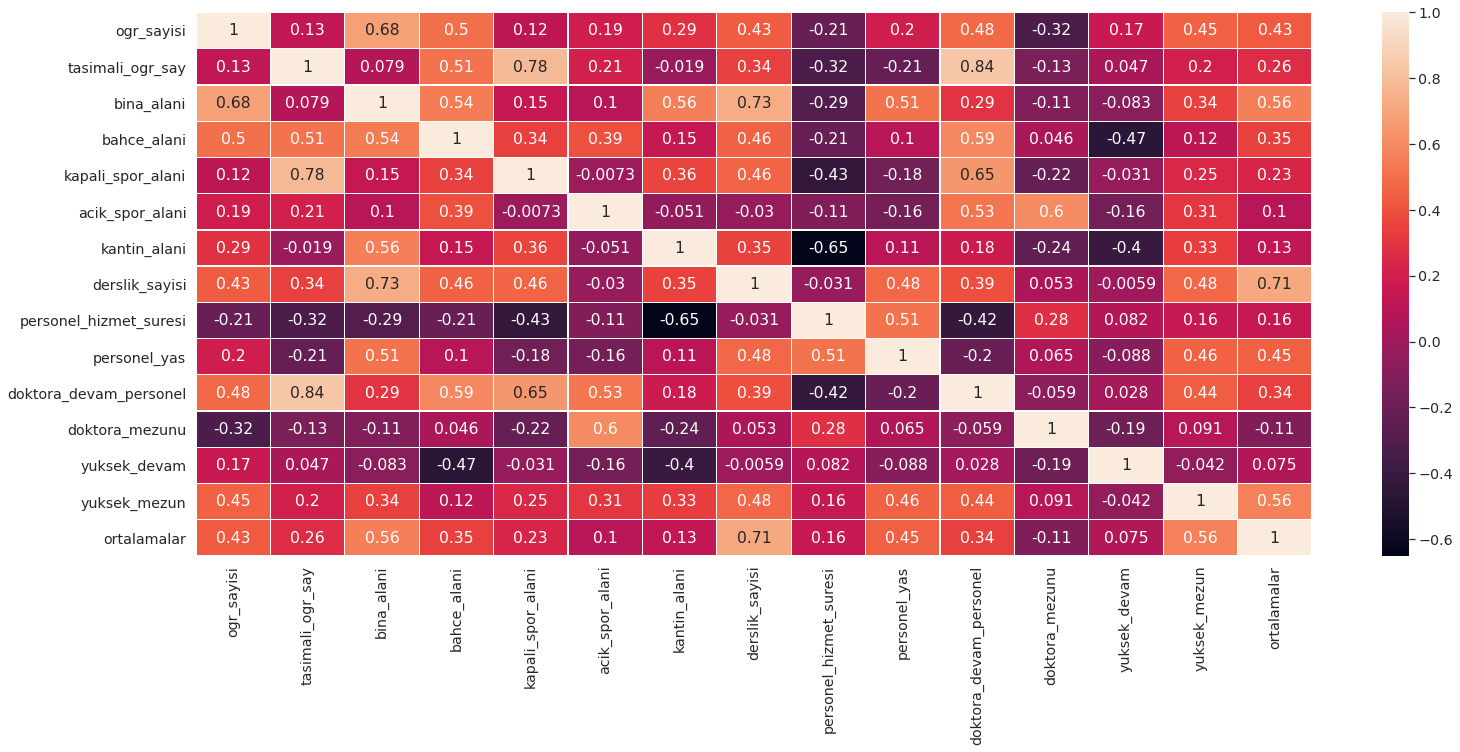

In [ ]:
fig, ax = plt.subplots(figsize=(25,10)) 
plt.xticks(rotation=60)
sns.heatmap(df_okul_ozellik.corr(), annot=True, linewidths=0.3, ax=ax)

In [ ]:
reduced_col_names = df_okul_ozellik.corr().abs()["ortalamalar"].index
df_okul_ozellik[reduced_col_names].corr()["ortalamalar"]

ogr_sayisi                0.430163
tasimali_ogr_say          0.264786
bina_alani                0.555804
bahce_alani               0.348044
kapali_spor_alani         0.233859
acik_spor_alani           0.100213
kantin_alani              0.131883
derslik_sayisi            0.714156
personel_hizmet_suresi    0.159252
personel_yas              0.451422
doktora_devam_personel    0.342686
doktora_mezunu           -0.114911
yuksek_devam              0.074954
yuksek_mezun              0.563067
ortalamalar               1.000000
Name: ortalamalar, dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text major ticklabel objects>)

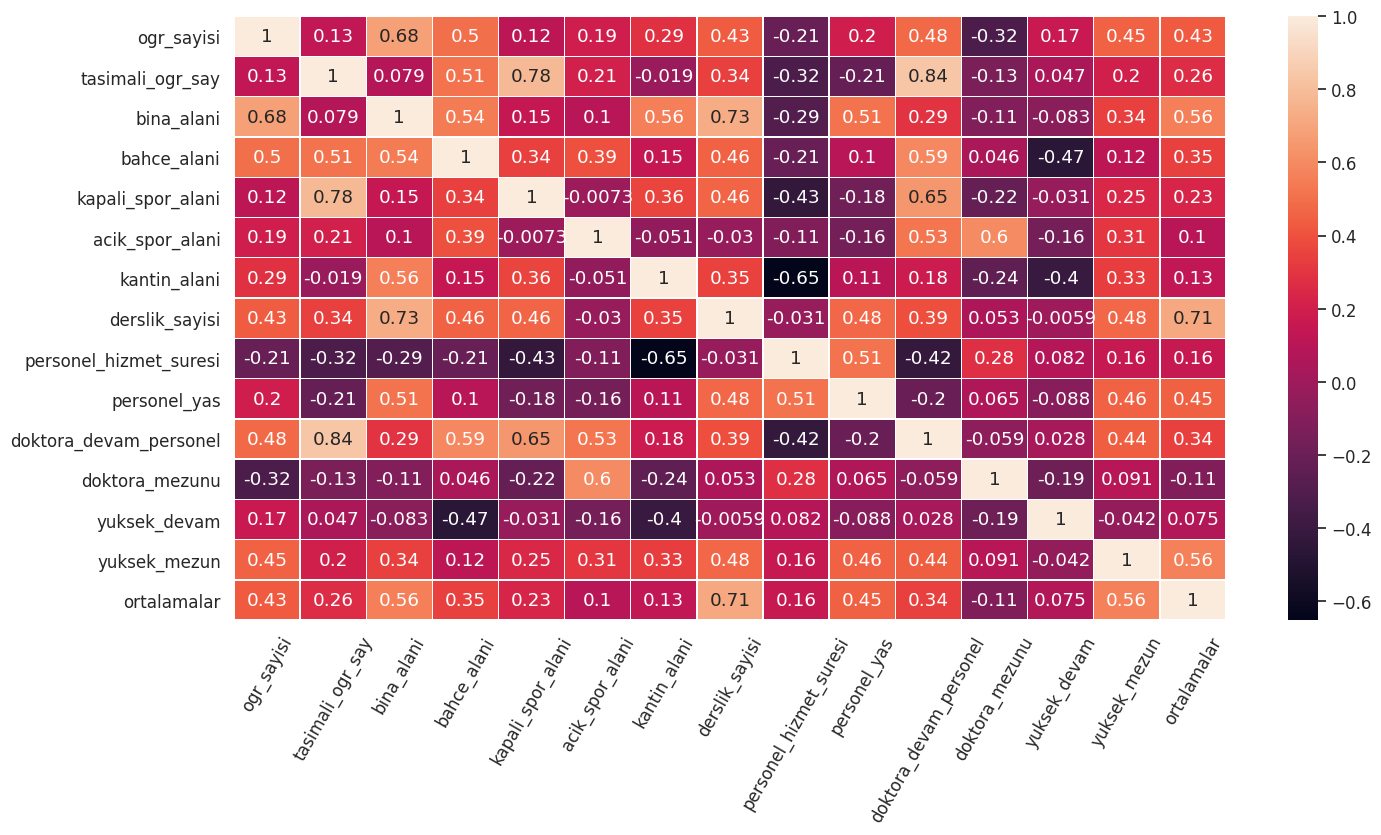

In [ ]:
fig, ax = plt.subplots(figsize=(16,8), dpi=100) 
sns.set(font_scale=1.1)
sns.heatmap(df_okul_ozellik[reduced_col_names].corr(), annot=True, linewidths=0.3, ax=ax)
plt.xticks(rotation=60)

---

##Sene sonu notlarının teker teker incelenmesi

In [ ]:
yeni_df = filtered_df[["okuladi", "ort5", "ort6", "ort7"]]

In [ ]:
yeni_df

,okuladi,ort5,ort6,ort7
0,OKUL1,85.5956,88.0247,91.0988
1,OKUL1,96.3081,94.9244,97.2963
2,OKUL1,93.4270,91.3742,89.7531
3,OKUL1,64.5563,64.8812,61.3426
4,OKUL1,91.8089,93.9298,93.3457
...,...,...,...,...
1175,OKUL31,97.4291,95.1857,95.7143
1176,OKUL31,89.9984,85.7941,87.6460
1177,OKUL31,98.2679,98.5000,95.3492
1178,OKUL31,94.0053,92.5302,95.2413


In [ ]:
yeni_ort = pd.merge(df_okullar,yeni_df , how='right', left_on='okul_adi', right_on='okuladi')

In [ ]:
yeni_ort.drop(columns="okuladi", axis=1, inplace=True)

In [ ]:
yeni_ort

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,derslik_sayisi,personel_hizmet_suresi,personel_yas,doktora_devam_personel,doktora_mezunu,yuksek_devam,yuksek_mezun,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,ort5,ort6,ort7
0,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,85.5956,88.0247,91.0988
1,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,96.3081,94.9244,97.2963
2,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,93.4270,91.3742,89.7531
3,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,64.5563,64.8812,61.3426
4,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,91.8089,93.9298,93.3457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,97.4291,95.1857,95.7143
934,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,89.9984,85.7941,87.6460
935,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,98.2679,98.5000,95.3492
936,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,94.0053,92.5302,95.2413


In [ ]:
df_yeni_ortalamalar = pd.DataFrame(yeni_ort.iloc[:, -3:].mean(axis=1), columns=["ortalamalar"])

In [ ]:
df_yeni_ortalamalar

,ortalamalar
0,88.239700
1,96.176267
2,91.518100
3,63.593367
4,93.028133
...,...
933,96.109700
934,87.812833
935,97.372367
936,93.925600


In [ ]:
df_yeni_ortalamalar = pd.merge(yeni_ort, df_yeni_ortalamalar, left_index=True, right_index=True)

In [ ]:
df_yeni_ortalamalar

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,derslik_sayisi,personel_hizmet_suresi,personel_yas,doktora_devam_personel,doktora_mezunu,yuksek_devam,yuksek_mezun,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,ort5,ort6,ort7,ortalamalar
0,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,85.5956,88.0247,91.0988,88.239700
1,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,96.3081,94.9244,97.2963,96.176267
2,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,93.4270,91.3742,89.7531,91.518100
3,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,64.5563,64.8812,61.3426,63.593367
4,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,91.8089,93.9298,93.3457,93.028133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,97.4291,95.1857,95.7143,96.109700
934,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,89.9984,85.7941,87.6460,87.812833
935,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,98.2679,98.5000,95.3492,97.372367
936,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,94.0053,92.5302,95.2413,93.925600


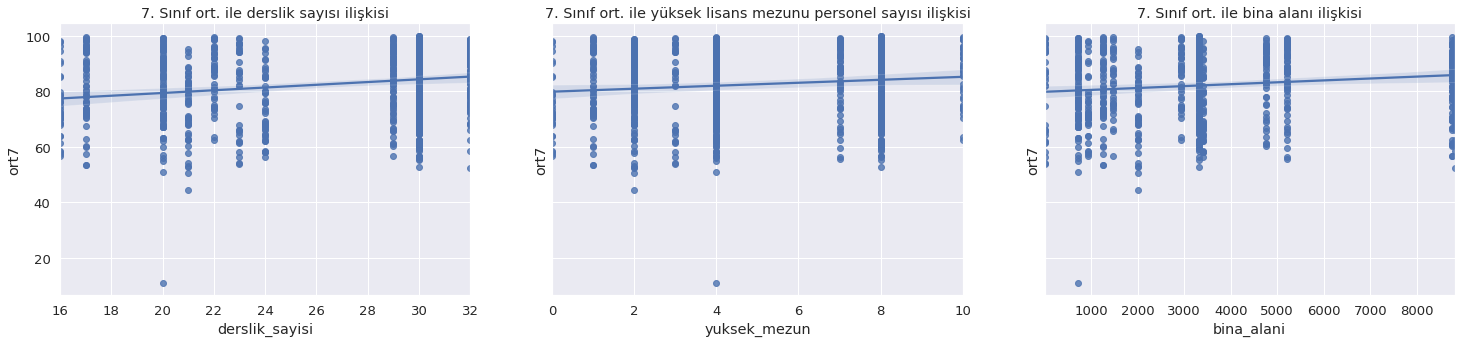

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25,5), sharey=True)

sns.set(font_scale=1.2)
sns.regplot(ax=axes[0],x=yeni_ort.derslik_sayisi, y=yeni_ort.ort7, ci=100).set_title("7. Sınıf ort. ile derslik sayısı ilişkisi");
#axes[0].set_title('Title of the first chart')
sns.regplot(ax=axes[1], x=yeni_ort.yuksek_mezun, y=yeni_ort.ort7, ci=100).set_title("7. Sınıf ort. ile yüksek lisans mezunu personel sayısı ilişkisi");
sns.regplot(ax=axes[2],x=yeni_ort.bina_alani, y=yeni_ort.ort7, ci=100).set_title("7. Sınıf ort. ile bina alanı ilişkisi");

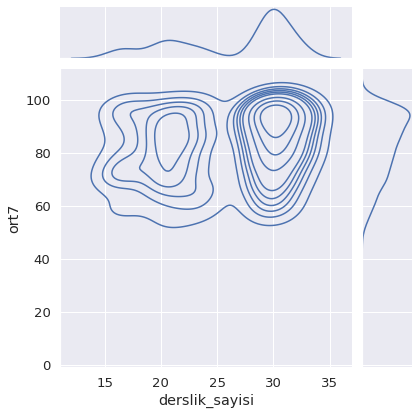

In [ ]:
sns.jointplot(x = yeni_ort.derslik_sayisi, y = yeni_ort.ort7, kind="kde")

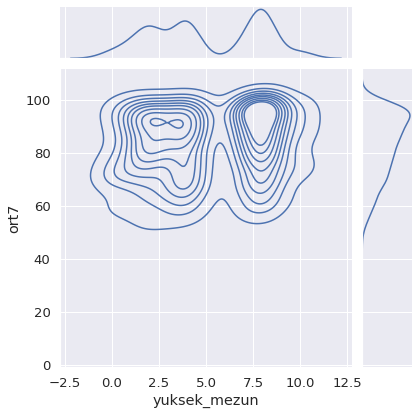

In [ ]:
sns.jointplot(x = yeni_ort.yuksek_mezun, y = yeni_ort.ort7, kind="kde")

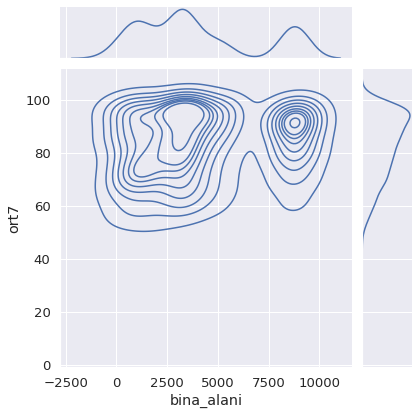

In [ ]:
sns.jointplot(x = yeni_ort.bina_alani, y = yeni_ort.ort7, kind="kde")

In [ ]:
df_ort5 = yeni_ort.drop(columns = ["ort6", "ort7"], axis = 1)

In [ ]:
df_ort5

,okul_adi,ogr_sayisi,tasimali_ogr_say,bina_alani,bahce_alani,kapali_spor_alani,acik_spor_alani,kantin_alani,cok_amacli_salon,derslik_sayisi,personel_hizmet_suresi,personel_yas,doktora_devam_personel,doktora_mezunu,yuksek_devam,yuksek_mezun,tasarim_atolyesi,fen_laboratuvari,bilisim_laboratuvari,ort5
0,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,85.5956
1,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,96.3081
2,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,93.4270
3,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,64.5563
4,OKUL1,982,0,8750,4850,300,2000,500.0,1,30,5.0,41.0,1,0,0,8,1,0,1,91.8089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,97.4291
934,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,89.9984
935,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,98.2679
936,OKUL31,1104,0,4750,4050,0,1800,45.0,1,29,12.0,35.0,1,0,2,4,1,1,0,94.0053


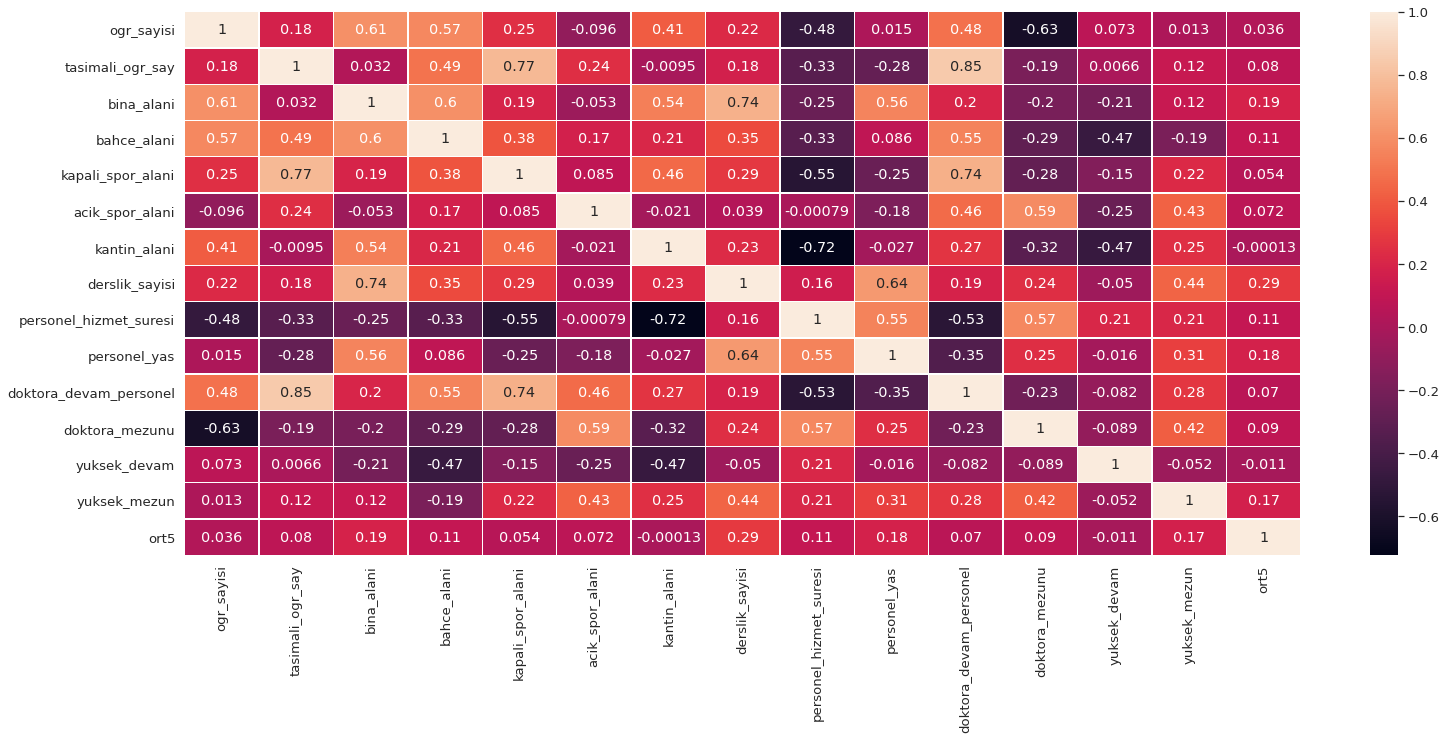

In [ ]:
fig, ax = plt.subplots(figsize=(25,10)) 
plt.xticks(rotation=60)
sns.heatmap(df_ort5.corr(), annot=True, linewidths=0.3, ax=ax)

#Okullara göre not ortalamalarının dağılımları

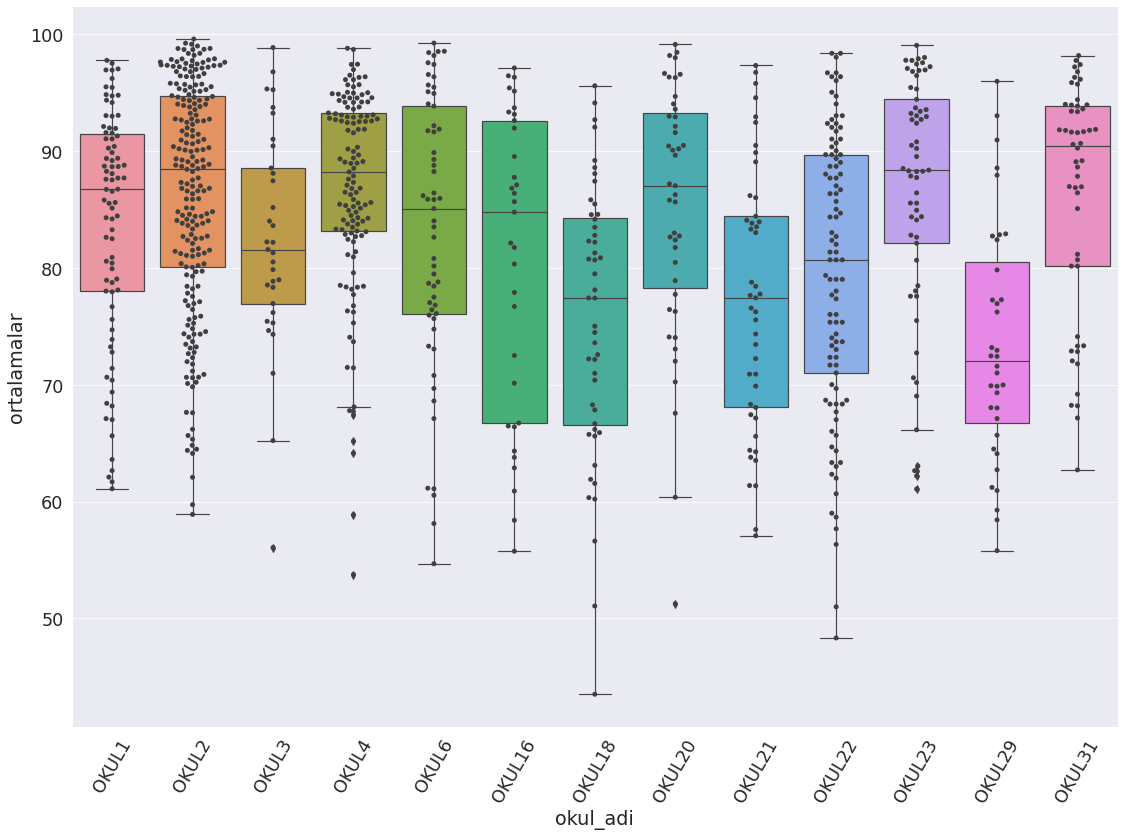

In [ ]:
plt.figure(figsize=(16,12))
sns.set_context("paper", font_scale=2)
ax = sns.boxplot(x = df_yeni_ortalamalar.okul_adi, y = df_yeni_ortalamalar.ortalamalar)
ax = sns.swarmplot(x="okul_adi", y="ortalamalar", data=df_yeni_ortalamalar, color=".25")
plt.xticks(rotation=60)                                                               
plt.tight_layout()  
plt.show()